# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [1]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Using TensorFlow backend.


Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun: "the_nightmare"

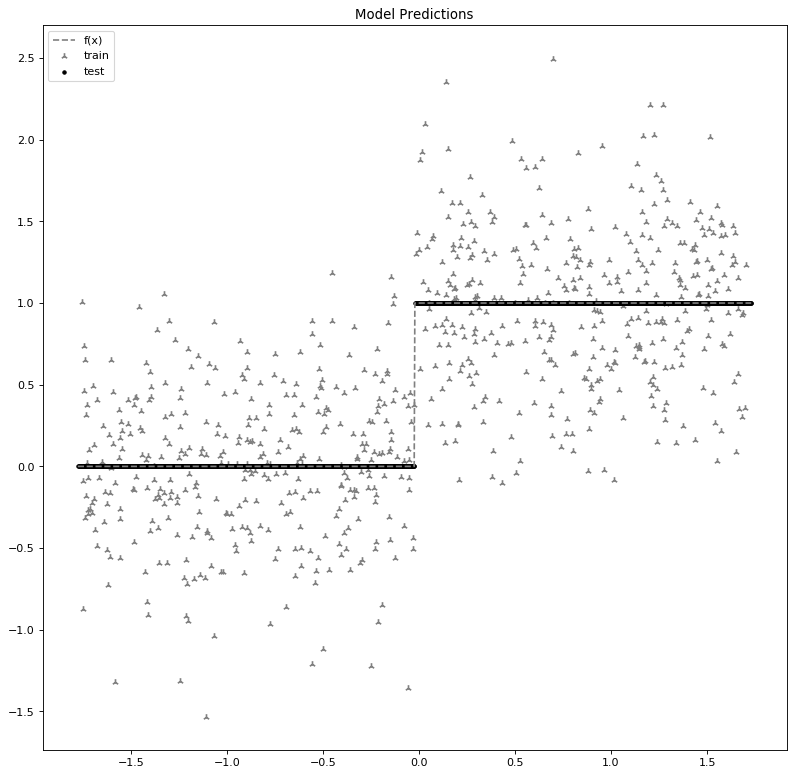

Simulation Confiugration Information:
 
We're plotting the function: jumpdiscontinuity with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


In [2]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "jumpdiscontinuity"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [3]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))

robustness_dictionary = {'robustness_parameter': [var_estimate,var_estimate*2,var_estimate*3]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_Vanilla_Nets = {**Training_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **Epochs_dictionary}

param_grid_NEU_Nets = {**Training_dictionary,
                       **robustness_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **param_grid_NEU_readout_extra_parameters,
                       **param_grid_NEU_feature_extra_parameters,
                       **NEU_Epochs_Feature_dictionary_coupled}

param_grid_NEU_Feature_Only_Nets = {**Training_dictionary,
                                    **robustness_dictionary,
                                    **param_grid_NEU_feature_extra_parameters,
                                    **NEU_Epochs_Feature_dictionary}

NEU_Structure_Dictionary = {**Training_dictionary,
                            **robustness_dictionary,
                            **param_grid_NEU_readout_extra_parameters,
                            **NEU_Epochs_dictionary}

# Benchmark Models

Run univariate regression benchmarks file:

In [4]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Batch computation too fast (0.1072s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.0s finished


Epoch 1/10
94/94 [==============================] - 0s 881us/step - loss: 0.6804 - mse: 0.7111 - mae: 0.6804 - mape: 99.2992
Epoch 2/10
94/94 [==============================] - 0s 898us/step - loss: 0.6755 - mse: 0.7014 - mae: 0.6755 - mape: 100.2328
Epoch 3/10
94/94 [==============================] - 0s 946us/step - loss: 0.6704 - mse: 0.6912 - mae: 0.6704 - mape: 101.3708
Epoch 4/10
94/94 [==============================] - 0s 906us/step - loss: 0.6651 - mse: 0.6809 - mae: 0.6651 - mape: 102.4215
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6595 - mse: 0.6698 - mae: 0.6595 - mape: 103.5844
Epoch 6/10
94/94 [==============================] - 0s 905us/step - loss: 0.6537 - mse: 0.6584 - mae: 0.6537 - mape: 105.5327
Epoch 7/10
94/94 [==============================] - 0s 898us/step - loss: 0.6474 - mse: 0.6466 - mae: 0.6474 - mape: 106.7797
Epoch 8/10
94/94 [==============================] - 0s 903us/step - loss: 0.6409 - mse: 0.6339 - mae: 0.6409 - mape: 108.

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [5]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [6]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x**2],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test**2],axis=1)
    d = d+1
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print("Modified Input since Dimension is too low")

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [7]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.1s finished


Epoch 1/20
94/94 [==============================] - 0s 3ms/step - loss: 0.9388 - mse: 0.7756 - mae: 0.7132 - mape: 116.9239
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.9183 - mse: 0.7454 - mae: 0.6988 - mape: 116.7139
Epoch 3/20
94/94 [==============================] - 0s 3ms/step - loss: 0.9039 - mse: 0.7172 - mae: 0.6852 - mape: 119.3715
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.8913 - mse: 0.6889 - mae: 0.6713 - mape: 120.7566
Epoch 5/20
94/94 [==============================] - 0s 3ms/step - loss: 0.8716 - mse: 0.6611 - mae: 0.6570 - mape: 123.4477
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.8385 - mse: 0.6344 - mae: 0.6432 - mape: 125.6316
Epoch 7/20
94/94 [==============================] - 0s 3ms/step - loss: 0.8222 - mse: 0.6084 - mae: 0.6295 - mape: 128.0889
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 0.7922 - mse: 0.5830 - mae: 0.6157 - mape: 130.4677
Epoch 9/

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [8]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
# NEU_lin_reg = LinearRegression()
# NEU_lin_reg.fit(data_x_featured_train,data_y)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
NEU_lin_reg = ElasticNetCV(cv=5, random_state=0, alphas = np.linspace(0,(10**2),(10**2)),
                           l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

ElasticNetCV(alphas=array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.2828...
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [9]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.1s finished


Epoch 1/5
94/94 [==============================] - 0s 3ms/step - loss: 0.7499 - mse: 0.5318 - mae: 0.5880 - mape: 140.6430
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.7215 - mse: 0.4995 - mae: 0.5691 - mape: 143.8547
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.7020 - mse: 0.4695 - mae: 0.5516 - mape: 145.9920
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6801 - mse: 0.4415 - mae: 0.5340 - mape: 148.9415
Epoch 5/5
127/127 [==============================] - 0s 1ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the OLS and the NEU-OLS models:

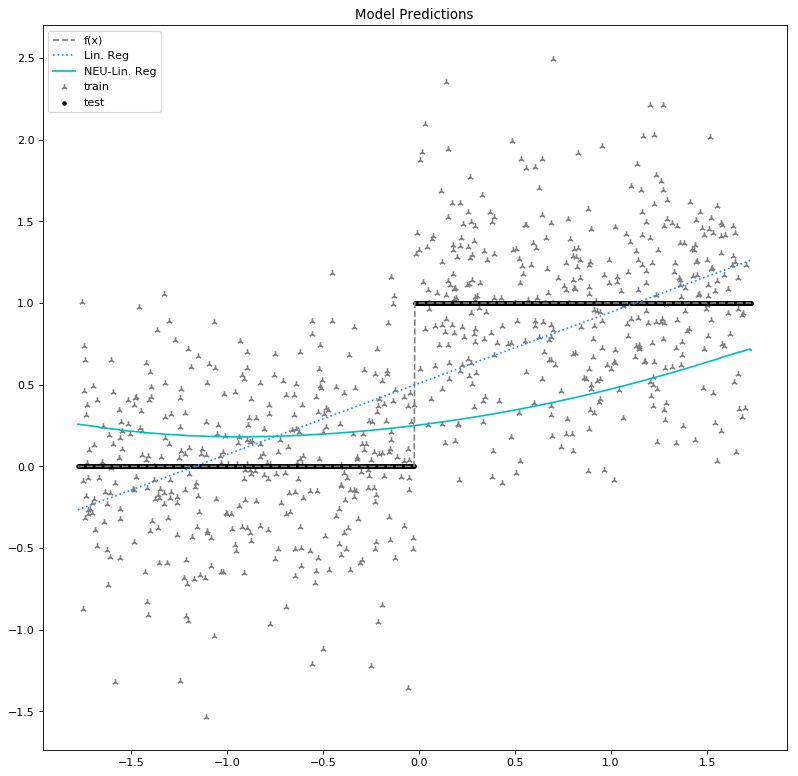

In [10]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

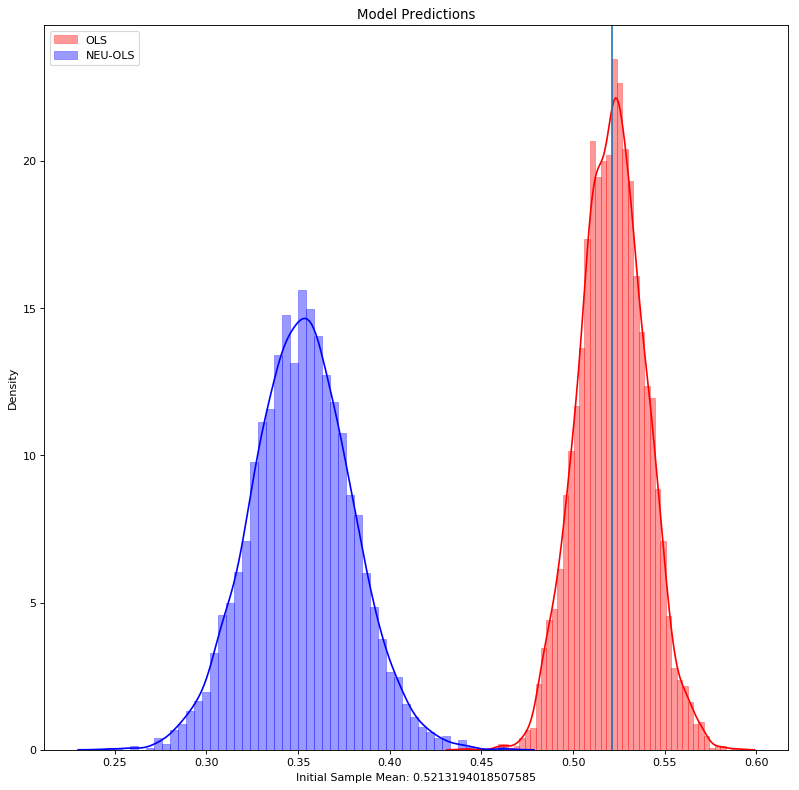

In [11]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test,"OLS")

#### Comparison between Elastic-Net and NEU-ENET

In [12]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

Elastic-Net Performance:
                 Train       Test
Er. 95L  -3.818986e-02  -0.013854
Er. Mean -8.526513e-17   0.001402
Er. 95U   3.762130e-02   0.016641
MAE       4.170379e-01   0.209308
MSE       2.782873e-01   0.062578
MAPE      3.401399e+02  64.652173
NEU-ENET Performance:
               Train        Test
Er. 95L     0.135298    0.147663
Er. Mean    0.179043    0.171754
Er. 95U     0.222544    0.195826
MAE         0.509114    0.377419
MSE         0.403026    0.181752
MAPE      176.899830  122.143063


---
# Non-Linear Models
---

### NEU-Smoothing Splines

In [13]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test = get_smooting_splines(data_x = (data_x_NEU_train_feature_only.mean(axis=1)),
                                                                                       data_x_test = (data_x_NEU_test_feature_only.mean(axis=1)),
                                                                                       data_y = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_Ssplines = np.concatenate([data_x_featured_train,
                                   NEU_Ssplines_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_Ssplines = np.concatenate([data_x_featured_test,
                                  NEU_Ssplines_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_Ssplines_y_hat_train, NEU_Ssplines_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_Ssplines, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_Ssplines)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.8s finished


Epoch 1/5
94/94 [==============================] - 0s 3ms/step - loss: 0.7698 - mse: 0.5533 - mae: 0.5960 - mape: 96.2907
Epoch 2/5
94/94 [==============================] - 0s 5ms/step - loss: 0.7322 - mse: 0.5121 - mae: 0.5721 - mape: 99.4386
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.7047 - mse: 0.4734 - mae: 0.5501 - mape: 106.5596
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6762 - mse: 0.4371 - mae: 0.5277 - mape: 112.0026
Epoch 5/5
127/127 [==============================] - 0s 2ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the Smoothing Splines and the NEU-Smoothing Splines models:

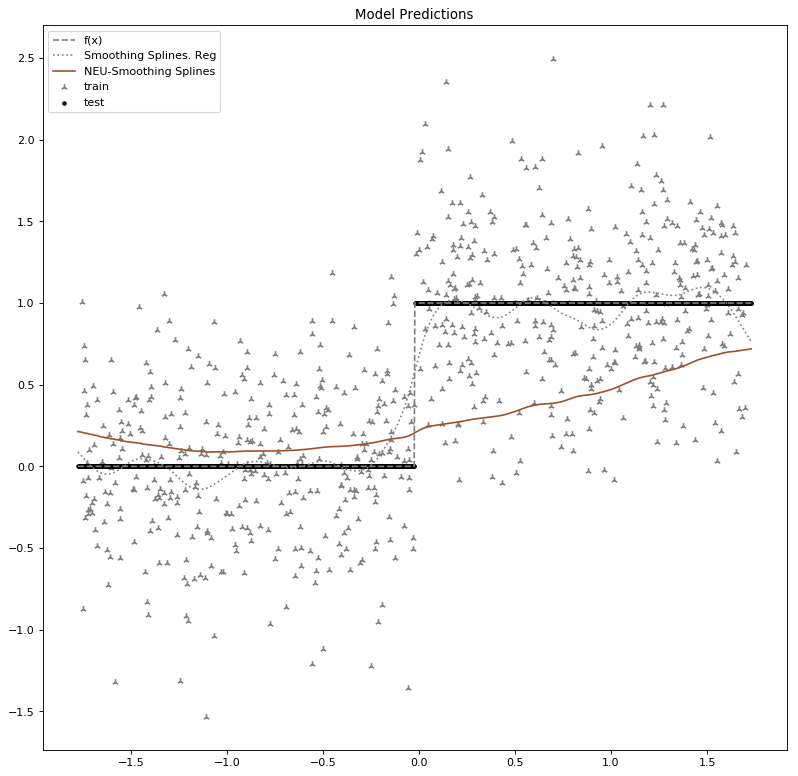

In [14]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test, color = 'grey',linestyle=":", label='Smoothing Splines. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_Ssplines_y_hat_test, color = 'sienna',label='NEU-Smoothing Splines')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

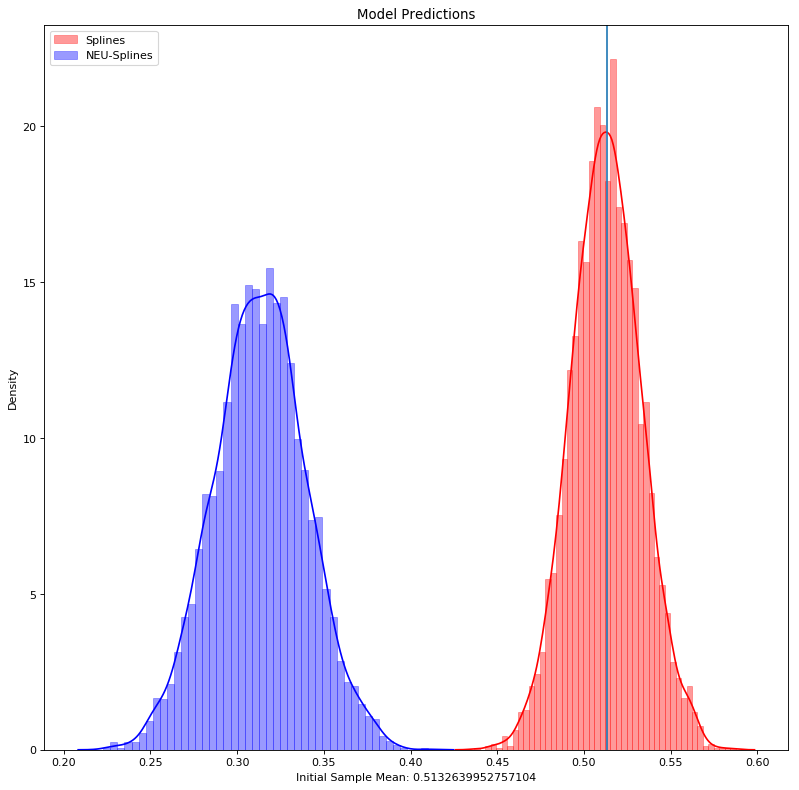

In [15]:
get_Error_distribution_plots(data_y_test,f_hat_smoothing_splines_test,NEU_Ssplines_y_hat_test,"Splines")

#### Numerical Comparison between the Smoothing Splines regressor and NEU-Smoothing Splines regressor models:

In [16]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Smoothing Splines Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Smoothing Splines Performance:")
print(reporter(NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test,data_y,data_y_test))

Smoothing Splines Performance:
                 Train       Test
Er. 95L  -3.417298e-02   0.002869
Er. Mean  9.126921e-15   0.009458
Er. 95U   3.469590e-02   0.015761
MAE       3.760087e-01   0.068552
MSE       2.226811e-01   0.011036
MAPE      1.892707e+03  54.208750
NEU-Smoothing Splines Performance:
               Train        Test
Er. 95L     0.174419    0.187882
Er. Mean    0.215423    0.209672
Er. 95U     0.256939    0.231284
MAE         0.497422    0.337143
MSE         0.389806    0.169846
MAPE      237.569027  124.429368


### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [17]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train,NEU_KReg_y_hat_test, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_featured_train,
                                   NEU_KReg_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_featured_test,
                                  NEU_KReg_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_KReg, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_KReg)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0495s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.4s finished


Epoch 1/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6599 - mse: 0.4285 - mae: 0.5322 - mape: 224.0213
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6384 - mse: 0.4066 - mae: 0.5162 - mape: 222.8695
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6229 - mse: 0.3847 - mae: 0.4999 - mape: 215.0504
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.6021 - mse: 0.3622 - mae: 0.4830 - mape: 206.5433
Epoch 5/5
127/127 [==============================] - 0s 1ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

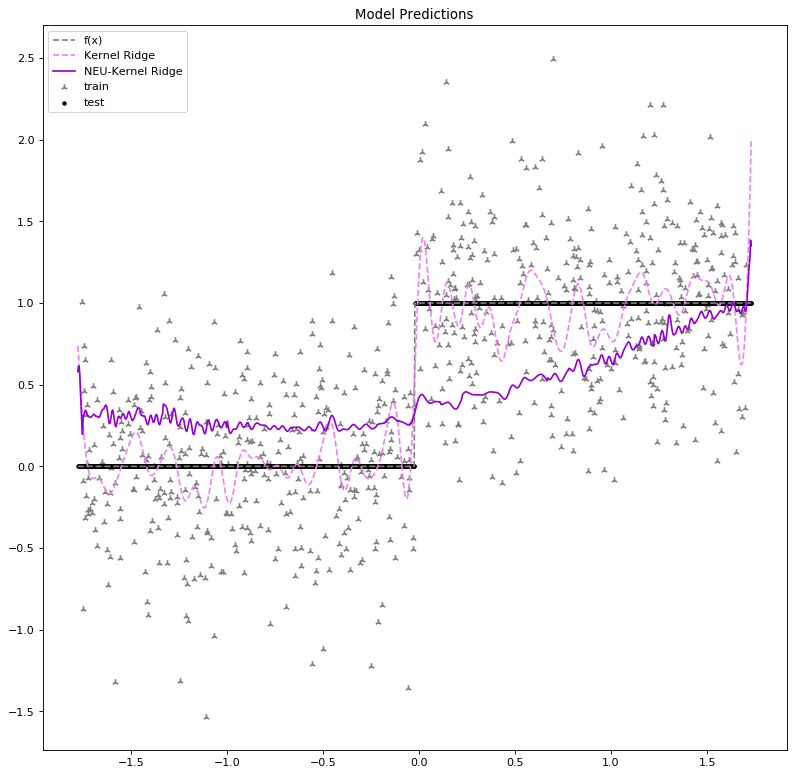

In [18]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

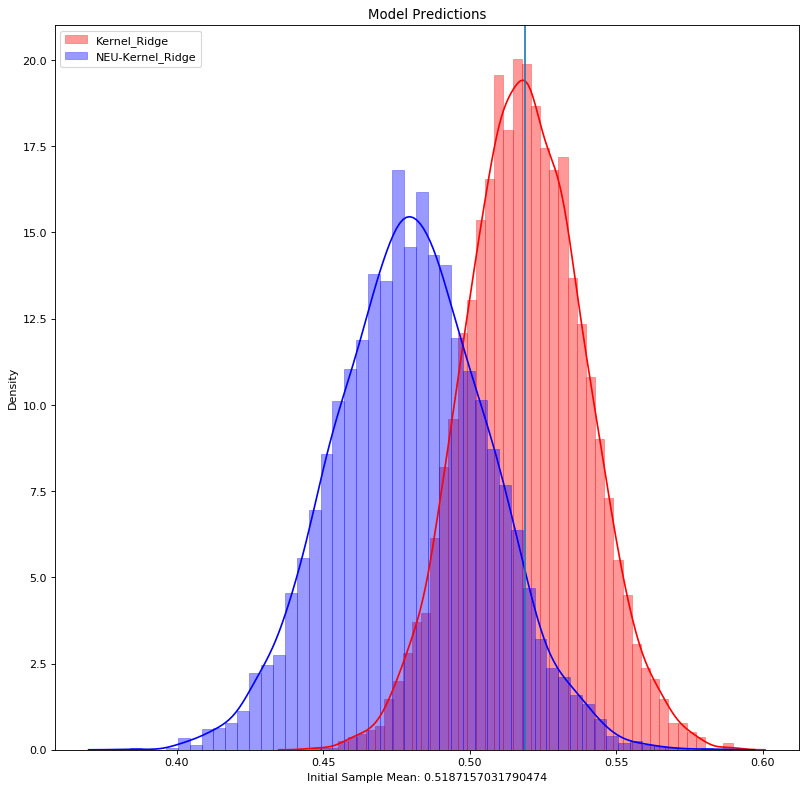

In [19]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [20]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
                Train       Test
Er. 95L     -0.031605  -0.006036
Er. Mean     0.000017   0.004006
Er. 95U      0.032730   0.013859
MAE          0.362751   0.123681
MSE          0.204808   0.026366
MAPE      1567.714081  57.537876
NEU-Kernel Ridge-Performance:
               Train       Test
Er. 95L     0.011187   0.020998
Er. Mean    0.052126   0.042410
Er. 95U     0.092457   0.063896
MAE         0.456046   0.314992
MSE         0.326945   0.121230
MAPE      124.997729  85.762215


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [21]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_GBRF, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_GBRF)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0854s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.1s finished


Epoch 1/5
94/94 [==============================] - 0s 3ms/step - loss: 0.9031 - mse: 0.7265 - mae: 0.6881 - mape: 107.4811
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.8713 - mse: 0.6842 - mae: 0.6672 - mape: 108.4568
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.8476 - mse: 0.6462 - mae: 0.6477 - mape: 110.3694
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.8237 - mse: 0.6075 - mae: 0.6272 - mape: 111.8486
Epoch 5/5
127/127 [==============================] - 0s 1ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved


#### Visual Comaprison between the GBRF and the NEU-GBRF models:

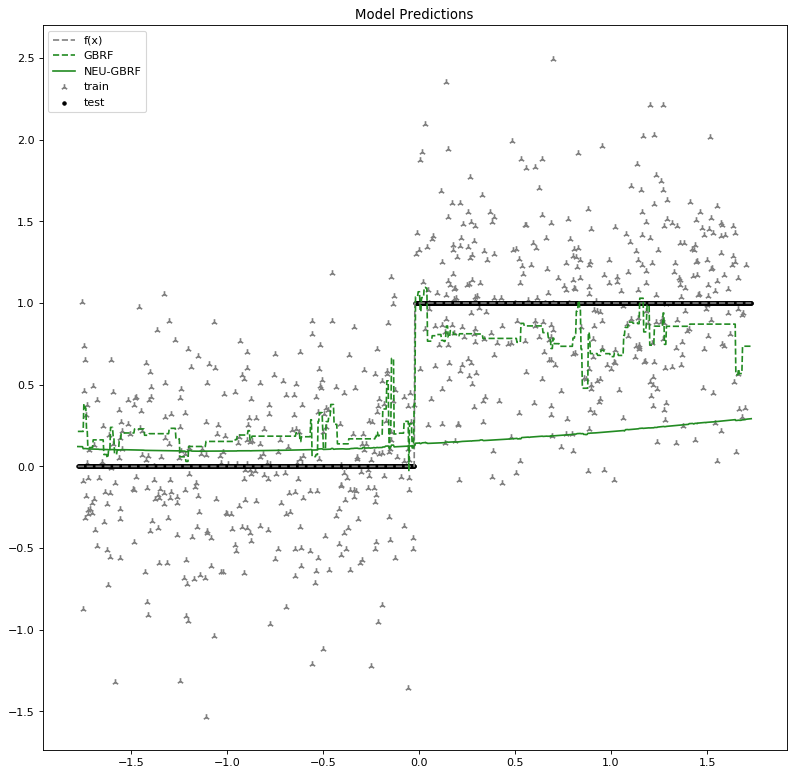

In [22]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

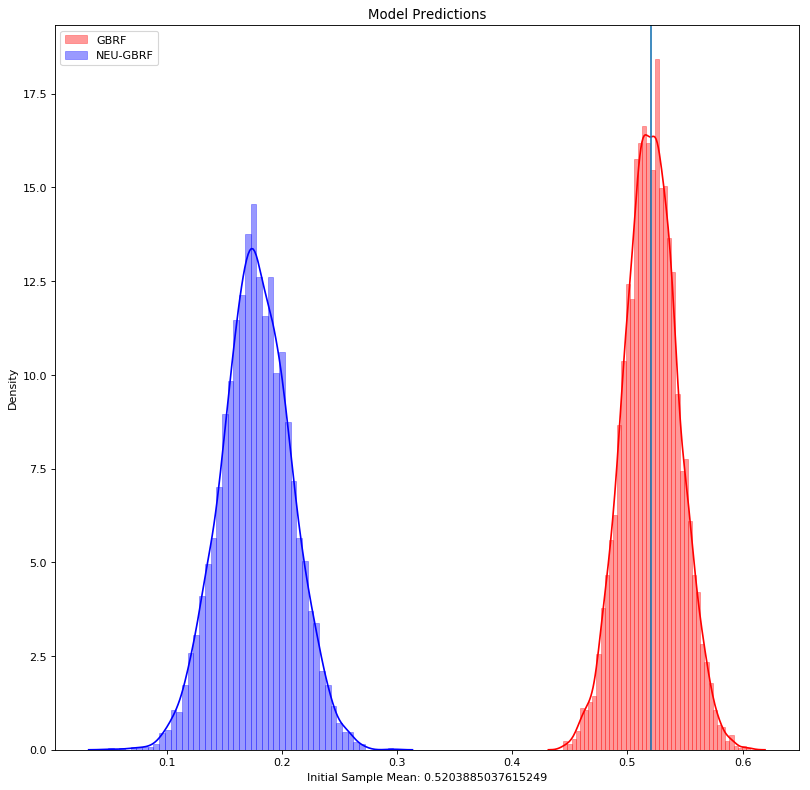

In [23]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [24]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
               Train       Test
Er. 95L    -0.034137  -0.010633
Er. Mean    0.000000   0.002333
Er. 95U     0.033909   0.014898
MAE         0.377324   0.191779
MSE         0.225330   0.044070
MAPE      157.340831  63.206834
NEU-GBRF-Performance:
               Train        Test
Er. 95L     0.307389    0.318720
Er. Mean    0.353138    0.345386
Er. 95U     0.400372    0.372580
MAE         0.592942    0.448393
MSE         0.544607    0.321444
MAPE      390.041325  254.825671


---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [25]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   42.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   42.7s finished


Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.8292 - mse: 0.6308 - mae: 0.6407 - mape: 120.9582
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.8044 - mse: 0.5996 - mae: 0.6254 - mape: 131.6320
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.7882 - mse: 0.5718 - mae: 0.6117 - mape: 146.2316
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.7704 - mse: 0.5447 - mae: 0.5980 - mape: 157.9410
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.7491 - mse: 0.5196 - mae: 0.5850 - mape: 172.5398
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.7194 - mse: 0.4970 - mae: 0.5736 - mape: 186.5787
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.7053 - mse: 0.4768 - mae: 0.5628 - mape: 197.6205
Epoch 8/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6817 - mse: 0.4588 - mae: 0.5527 - mape: 208.7517
Epoch 9/

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [26]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   36.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   36.7s finished


Epoch 1/50
94/94 [==============================] - 1s 6ms/step - loss: 0.9432 - mse: 0.7789 - mae: 0.7169 - mape: 127.1981
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.8295 - mse: 0.6278 - mae: 0.6369 - mape: 110.3361
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.7417 - mse: 0.5130 - mae: 0.5691 - mape: 119.1294
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6835 - mse: 0.4446 - mae: 0.5232 - mape: 120.2509
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6422 - mse: 0.4066 - mae: 0.4960 - mape: 130.1975
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6212 - mse: 0.3859 - mae: 0.4839 - mape: 115.6480
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6028 - mse: 0.3661 - mae: 0.4710 - mape: 117.8172
Epoch 8/50
94/94 [==============================] - 1s 6ms/step - loss: 0.5844 - mse: 0.3525 - mae: 0.4637 - mape: 110.4747
Epoch 9/

#### Decoupled Implementation

In [27]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.5s finished


Epoch 1/10
94/94 [==============================] - 0s 884us/step - loss: 0.7012 - mse: 0.7524 - mae: 0.7012 - mape: 107.8048
Epoch 2/10
94/94 [==============================] - 0s 859us/step - loss: 0.6931 - mse: 0.7359 - mae: 0.6931 - mape: 104.3817
Epoch 3/10
94/94 [==============================] - 0s 940us/step - loss: 0.6842 - mse: 0.7179 - mae: 0.6842 - mape: 100.0573
Epoch 4/10
94/94 [==============================] - 0s 891us/step - loss: 0.6741 - mse: 0.6983 - mae: 0.6741 - mape: 97.8765
Epoch 5/10
94/94 [==============================] - 0s 876us/step - loss: 0.6627 - mse: 0.6761 - mae: 0.6627 - mape: 99.2623
Epoch 6/10
94/94 [==============================] - 0s 880us/step - loss: 0.6503 - mse: 0.6520 - mae: 0.6503 - mape: 102.0037
Epoch 7/10
94/94 [==============================] - 0s 901us/step - loss: 0.6364 - mse: 0.6251 - mae: 0.6364 - mape: 104.6837
Epoch 8/10
94/94 [==============================] - 0s 970us/step - loss: 0.6213 - mse: 0.5974 - mae: 0.6213 - mape: 108

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.6s finished


Epoch 1/5
94/94 [==============================] - 0s 3ms/step - loss: 1.0727 - mse: 0.9669 - mae: 0.7958 - mape: 140.4509
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 1.0208 - mse: 0.8882 - mae: 0.7625 - mape: 129.3918
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.9318 - mse: 0.7587 - mae: 0.7035 - mape: 114.0032
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.8334 - mse: 0.6209 - mae: 0.6330 - mape: 103.8920
Epoch 5/5
127/127 [==============================] - 0s 2ms/step
NEU-Structure Map: Trained!
NEU-Structure Map: Saving
NEU-Structure: Saved
Phase 3 Complete: Trained NEU-Structure Map
NEU Statue: Trained


## Visualization

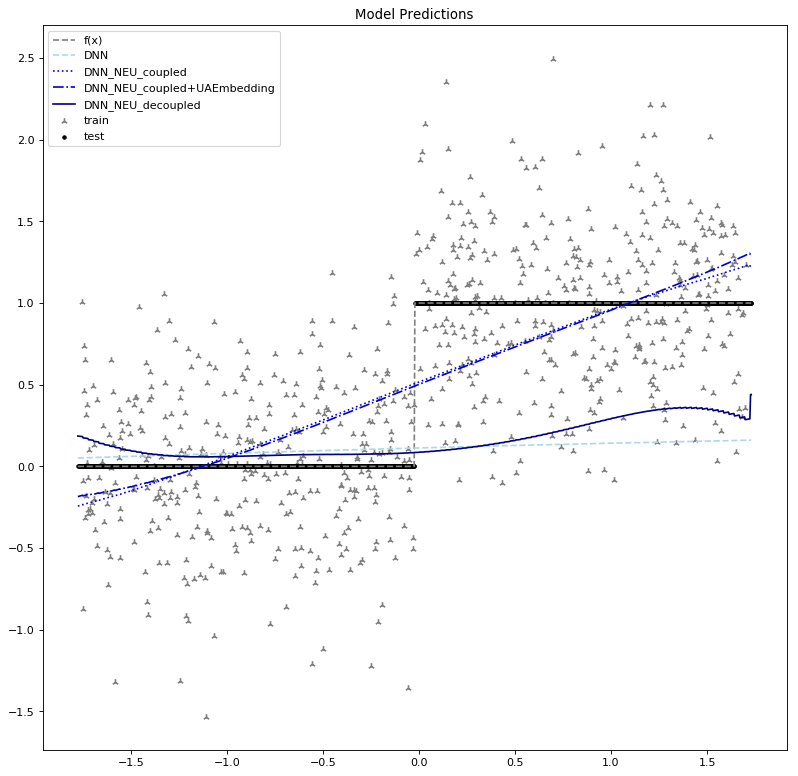

In [28]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

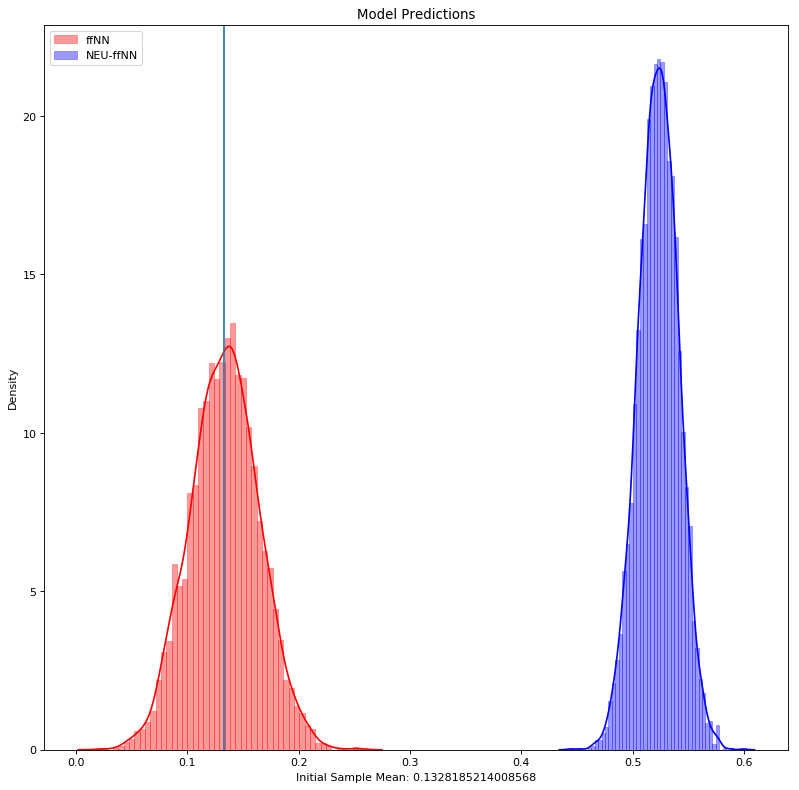

In [29]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [30]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

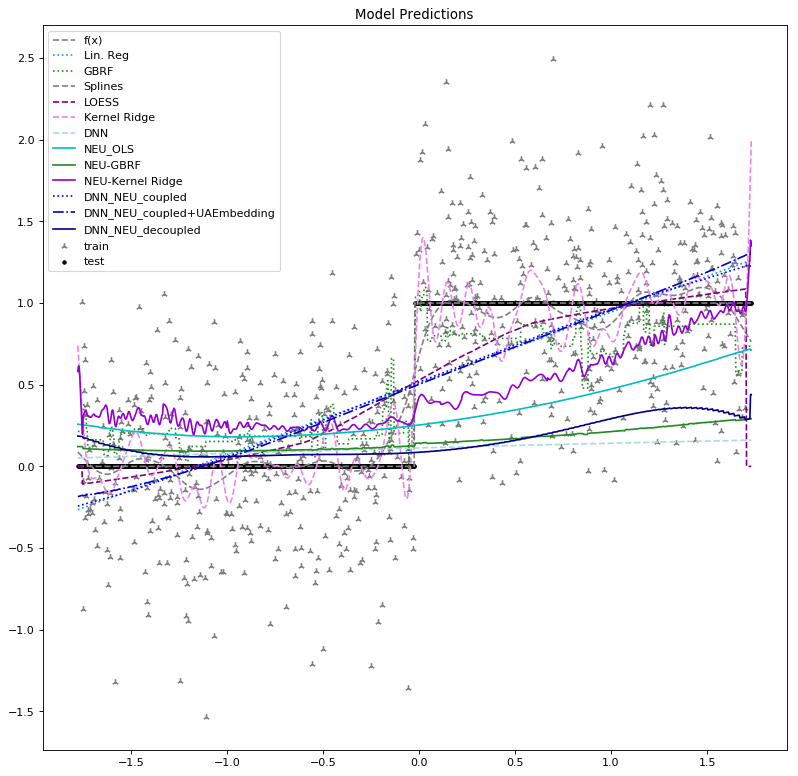

In [31]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [32]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
               Train        Test
Er. 95L     0.135931    0.147070
Er. Mean    0.179043    0.171754
Er. 95U     0.223102    0.195891
MAE         0.509114    0.377419
MSE         0.403026    0.181752
MAPE      176.899830  122.143063


In [33]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
                Train       Test
Er. 95L     -0.032331  -0.005959
Er. Mean     0.000017   0.004006
Er. 95U      0.031915   0.014027
MAE          0.362751   0.123681
MSE          0.204808   0.026366
MAPE      1567.714081  57.537876
NEU-Kernel Ridge-Performance:
               Train       Test
Er. 95L     0.011179   0.020824
Er. Mean    0.052126   0.042410
Er. 95U     0.093091   0.063832
MAE         0.456046   0.314992
MSE         0.326945   0.121230
MAPE      124.997729  85.762215


In [34]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
               Train       Test
Er. 95L    -0.033954  -0.010381
Er. Mean    0.000000   0.002333
Er. 95U     0.033343   0.015344
MAE         0.377324   0.191779
MSE         0.225330   0.044070
MAPE      157.340831  63.206834
NEU-GBRF-Performance:
               Train        Test
Er. 95L     0.306061    0.318102
Er. Mean    0.353138    0.345386
Er. 95U     0.399183    0.373862
MAE         0.592942    0.448393
MSE         0.544607    0.321444
MAPE      390.041325  254.825671


In [35]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
                 Train       Test
Er. 95L  -3.397623e-02   0.003028
Er. Mean  9.126921e-15   0.009458
Er. 95U   3.358007e-02   0.015902
MAE       3.760087e-01   0.068552
MSE       2.226811e-01   0.011036
MAPE      1.892707e+03  54.208750
LOESS Performance:
                Train      Test
Er. 95L     -0.037610 -0.005478
Er. Mean    -0.001857  0.007957
Er. 95U      0.034330  0.021246
MAE          0.403025  0.149194
MSE          0.257781  0.046892
MAPE      1457.732120       NaN


In [36]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
               Train        Test
Er. 95L     0.350205    0.360622
Er. Mean    0.397650    0.389903
Er. 95U     0.444894    0.418663
MAE         0.623382    0.472605
MSE         0.600378    0.375634
MAPE      553.987801  367.541034
NEU-ffNN (Coupled) Performance:
               Train       Test
Er. 95L    -0.040257  -0.015253
Er. Mean   -0.002024  -0.000235
Er. 95U     0.036102   0.014790
MAE         0.414925   0.201938
MSE         0.275334   0.059386
MAPE      459.366812  63.749911
NEU-ffNN (Coupled+UAEmbedding) Performance:
               Train       Test
Er. 95L    -0.040205  -0.016464
Er. Mean   -0.002797  -0.001705
Er. 95U     0.035223   0.012912
MAE         0.414607   0.202202
MSE         0.275263   0.059652
MAPE      368.626376  64.854412
NEU-ffNN (Decoupled) Performance:
               Train        Test
Er. 95L     0.302685    0.314613
Er. Mean    0.346509    0.340574
Er. 95U     0.392377    0.366866
MAE         0.577468    0.421614
MSE         0.520529    0.29

# Report

## Re-Summarize Learning Problem for easy recap :)

In [37]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: jumpdiscontinuity with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


## Train-Set Performance

In [38]:
train_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.034433,9.126921e-15,0.034413,0.376009,0.222681,1892.706922
LOESS,-0.038652,-1.857257e-03,0.034566,0.403025,0.257781,1457.732120
Elastic Net,-0.037698,-8.526513e-17,0.037144,0.417038,0.278287,340.139857
NEU-OLS,0.135904,1.790427e-01,0.222052,0.509114,0.403026,176.899830
Kernel,-0.032549,1.749160e-05,0.032259,0.362751,0.204808,1567.714081
NEU-KerRidge,0.011717,5.212589e-02,0.093221,0.456046,0.326945,124.997729
GBRF,-0.034181,0.000000e+00,0.033886,0.377324,0.225330,157.340831
NEU-GBRF,0.305842,3.531379e-01,0.399550,0.592942,0.544607,390.041325
ffNN,0.350987,3.976502e-01,0.445017,0.623382,0.600378,553.987801
NEU-ffNN (Readout-Form),-0.039636,-2.024406e-03,0.035541,0.414925,0.275334,459.366812


## Test-Set Performance

In [39]:
test__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,0.002904,0.009458,0.015870,0.068552,0.011036,54.208750
LOESS,-0.005439,0.007957,0.021572,0.149194,0.046892,NaN
Elastic Net,-0.013866,0.001402,0.016777,0.209308,0.062578,64.652173
NEU-OLS,0.147605,0.171754,0.196058,0.377419,0.181752,122.143063
Kernel,-0.006253,0.004006,0.013837,0.123681,0.026366,57.537876
NEU-KerRidge,0.020963,0.042410,0.063862,0.314992,0.121230,85.762215
GBRF,-0.010867,0.002333,0.015632,0.191779,0.044070,63.206834
NEU-GBRF,0.317085,0.345386,0.373217,0.448393,0.321444,254.825671
ffNN,0.361802,0.389903,0.419064,0.472605,0.375634,367.541034
NEU-ffNN (Readout-Form),-0.015066,-0.000235,0.014845,0.201938,0.059386,63.749911


#### The END

---